## Optimización estocástica parte 2
### Algoritmos con perturbación

Problema de las 8 reinas:
- El problema de las ocho reinas es un pasatiempo que consiste en poner ocho reinas en el tablero de ajedrez sin que se amenacen

In [1]:
from copy import copy
from pprint import pprint

import random
import numpy as np

In [2]:
def draw(points):
    """
    Dibuja el rango de movimientos de las reinas y 
    calcula el número de reinas que son amenazadas por una anterior
    """
    board = [
        [0 for _ in range(8)]
        for _ in range(8)
    ]
    overlap = 0
    for point in points:
        x, y = point
        if board[x][y] > 0:
            overlap += 1
        for i in range(8):
            board[x][i] += 1
            board[i][y] += 1
        board[x][y] -= 1
        for i,j in [[1,1], [-1, -1], [1, -1], [-1, 1]]:
            cnt = 1
            while 0 <= x+i*cnt < 8 and 0 <= y+j*cnt < 8:
                board[x+i*cnt][y+j*cnt] += 1
                cnt += 1
    return board, overlap

In [3]:
def draw_queens(points):
    """
    Dibuja el tablero con las reinas
    """
    board = [
        [0 for _ in range(8)]
        for _ in range(8)
    ]
    for x,y in points:
        board[x][y] = 1
    return board

In [4]:
def evaluate(points):
    """
    Calcula la cantidad de reinas que son amenazadas por una anterior
    """
    board, value = draw(points)
    return value

In [5]:
def greedy_guess(xs: list=list(range(8)), ys: list=list(range(8))):
    """
    Estima una configuración cercana a una solución tomando en cuenta que
    las reinas no pueden estar en los mismos renglones ni columnas.
    """
    xs_cp = copy(xs)
    ys_cp = copy(ys)
    points = []
    for _ in range(len(xs)):
        x = random.sample(xs_cp, 1)[-1]
        y = random.sample(ys_cp, 1)[-1]
        xs_cp.remove(x)
        ys_cp.remove(y)
        points.append([x,y])
    return points

In [6]:
def perturb(points: list, n: int=2):
    """
    Mueve hasta n reinas.
    """
    to_drop = random.sample(list(range(len(points))), n)
    dropped = [points[i] for i in to_drop]
    not_dropped = [points[i] for i in range(len(points)) if i not in to_drop]
    free_xs = [x for x, y in dropped]
    free_ys = [y for x, y in dropped]
    new_sub = greedy_guess(free_xs, free_ys)
    return not_dropped + new_sub

In [7]:
def algo(n_iter: int=20000) -> list:
    #Estimación inicial
    init = greedy_guess()
    best = init
    solutions = []
    num_solutions_per_epoch = []
    for i in range(n_iter):
        #Perturbación inicial. Mueve 5 reinas.
        guess = perturb(best, 5)
        best_value = evaluate(guess)
        #Búsqueda local.
        for _ in range(100):
            min_perturbed = perturb(guess) #Mueve dos reinas por cada iteración
            val = evaluate(min_perturbed)
            if val < best_value: #Toma la mejor solución local
                best_value = evaluate(min_perturbed)
                guess = min_perturbed
                if best_value == 0: #Si ninguna reina es amenazada, guarda la solución
                    solutions.append(min_perturbed)
        filtered = []
        for solution in solutions:
            list_sort = sorted(solution, key=lambda x: (x[0], x[1]))
            if not list_sort in filtered:
                filtered.append(list_sort)
        num_solutions_per_epoch.append(len(filtered))
    return solutions, num_solutions_per_epoch

In [13]:
solutions = algo()

Las soluciones están repetidas. El siguiente código debería eliminar soluciones repetidas

In [14]:
vectors, evol = solutions
for solution in vectors:
    list_sort = sorted(solution, key=lambda x: (x[0], x[1]))
    if not list_sort in filtered:
        filtered.append(list_sort)

In [ ]:
for solution in filtered:
    pprint(draw_queens(solution))

In [16]:
_, foo = solutions

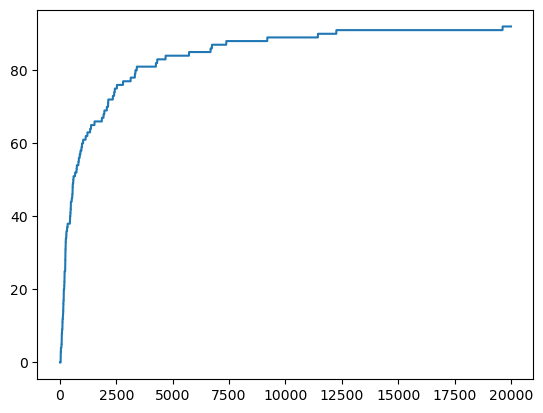

In [17]:
import matplotlib.pyplot as plt
plt.plot(foo)